In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calc(v2, concs, power):
    x = np.linspace(0,1, concs)
    x = np.power(x,power)
    x = x/x.max()*500   #normalize from 0-1, multiply by 200 =(500/2.5)
    x = pd.DataFrame(x) #conc in µM
    v1 =(v2*x)/10 # nl
    v1 = np.ceil(v1/2.5)*2.5
    return v1


###(calc(50,12, 4)/1000)*10000/50  ###Back calculating


data = pd.read_csv('20180913-Plate assay design - Plate 1 Layout (1).csv').drop(['Pattern',
                                                                            'Shake time/s',
                                                                           'Shake speed',
                                                                            'Plate ID'], 
                                                                            axis =1)

alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']

layout = pd.DataFrame([i + str(j) for j in range(1,25) for i in alphabet], columns = ['Well'])

reps = 3
newdata = pd.DataFrame()

for i in range(0, reps):
    newdata = newdata.append(data)
newdata = newdata.sort_values(['Vol/µl','[prot]/µM']) #make version of data with replicates


temp = pd.DataFrame() # temporary thing
newdata = newdata.reset_index() #yeeeeeeaap

for i in range(0,len(newdata)): ##replicate each experimental run by number of concentrations
    for j in range(0,newdata.loc[i,'No.concs']):
        temp = temp.append([newdata.loc[i]])

        
layout = pd.concat([layout,
                    temp.reset_index().drop(['index','level_0'],
                        axis =1)],
                   axis = 1,
                   join = 'inner')        

Vols = pd.Series(name = 'Volumes')

for i in range(0,len(newdata)):
    v2 = (newdata.loc[i]['Vol/µl'])
    concs = (newdata.loc[i]['No.concs'])
    power = (newdata.loc[i]['Power'])
    vols = calc(v2, concs, power)
    Vols = Vols.append(vols)
Vols = Vols.reset_index()
layout = pd.concat([layout, Vols],
                  axis = 1,
                  join = 'inner')
#sum(layout[0])/1000
#4*sum(layout['Vol/µl'].where(layout['[prot]/µM'] ==10).dropna())/1000  #how much stock??

#layout.to_csv('20180918-Mainplate layout.csv')
#sum(layout[0])/1000

#print(22.83 + 215.295)
layout.to_csv('20180919_layout.csv')

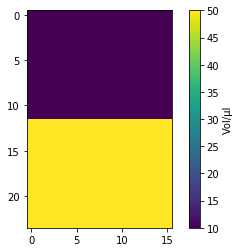

In [123]:
maparr = []
for i in layout['Vol/µl']:
    maparr = np.append(maparr, i)
plt.imshow(maparr.reshape(24,16))
plt.colorbar(label = 'Vol/µl')
plt.show()

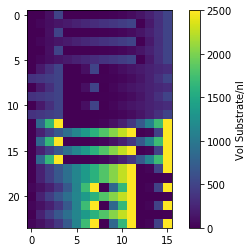

In [127]:
maparr = []
for i in layout[0]:
    maparr = np.append(maparr, i)
plt.imshow(maparr.reshape(24,16))
plt.colorbar(label = 'Vol Substrate/nl')
plt.show()

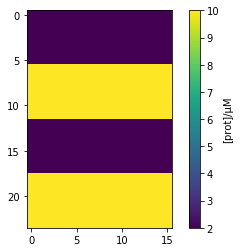

In [126]:
maparr = []
for i in layout['[prot]/µM']:
    maparr = np.append(maparr, i)
plt.imshow(maparr.reshape(24,16))
plt.colorbar(label = '[prot]/µM')
plt.show()

C:\Users\MFBX3JE3\Anaconda35\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


22.83

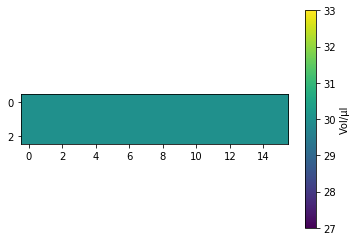

In [204]:
data2 = data
data2['Vol/µl'] = 30
data2['[prot]/µM'] = 6
data2['No.concs'] = 8
data2['Power'] = 2.5
data2 = data2.loc[0]

layout = pd.DataFrame([i + str(j) for j in range(1,25) for i in alphabet], columns = ['Well'])

reps = 6
newdata = pd.DataFrame()

for i in range(0, reps):
    newdata = newdata.append(data2)
newdata = newdata.sort_values(['Vol/µl','[prot]/µM']) #make version of data with replicates

temp = pd.DataFrame() # temporary thing
newdata = newdata.reset_index() #yeeeeeeaap

for i in range(0,len(newdata)): ##replicate each experimental run by number of concentrations
    for j in range(0,8):
        temp = temp.append([newdata.loc[i]])

layout = pd.concat([layout,
                    temp.reset_index().drop(['index','level_0'],
                                            axis =1)],
                   axis = 1,
                   join = 'inner')        

Vols = pd.Series(name = 'Volumes')

for i in range(0,len(newdata)):
    v2 = (newdata.loc[i]['Vol/µl'])
    concs = (newdata.loc[i]['No.concs'])
    power = (newdata.loc[i]['Power'])
    vols = calc(v2, concs, power)
    Vols = Vols.append(vols)
Vols = Vols.reset_index()
layout = pd.concat([layout, Vols],
                  axis = 1,
                  join = 'inner')
#sum(layout[0])/1000

maparr = []
for i in layout['Vol/µl']:
    maparr = np.append(maparr, i)
plt.imshow(maparr.reshape(3,16))
plt.colorbar(label = 'Vol/µl')
#plt.show()

#sum(layout['Vol/µl'])/1000

#layout.to_csv('20180918-MidpointPlate layout.csv')
sum(layout[0])/1000

In [210]:
alphabet[]

'B'

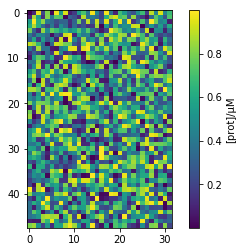

In [131]:
maparr = np.random.rand(1536)

plt.imshow(maparr.reshape(48,32))
plt.colorbar(label = '[prot]/µM')
plt.show()